In [ ]:
# The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. .
# Four files are available:

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
# Import dataset:
from tensorflow.keras.datasets import mnist

In [15]:
(X_test, y_test), (X_train, y_train) = mnist.load_data()


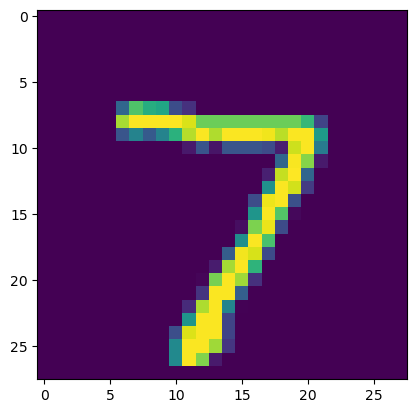

In [16]:
plt.imshow(X_train[0])

In [17]:

X_train = X_train/255.0
y_train = y_train/255.0

X_train[0].shape

(28, 28)

In [ ]:
encoder = tf.keras.models.Sequential()

encoder.add(tf.keras.layers.Flatten(input_shape = [28,28]))

encoder.add(tf.keras.layers.Dense(400,activation="relu"))
encoder.add(tf.keras.layers.Dense(units = 200, activation='relu'))
encoder.add(tf.keras.layers.Dense(units = 100, activation='relu'))
encoder.add(tf.keras.layers.Dense(units = 50, activation='relu'))
encoder.add(tf.keras.layers.Dense(units = 25, activation='relu'))

c:\Users\thedo\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
decoder = tf.keras.models.Sequential()

decoder.add(tf.keras.layers.Dense(units = 50, input_shape = [25], activation='relu'))
decoder.add(tf.keras.layers.Dense(units = 100, activation='relu'))
decoder.add(tf.keras.layers.Dense(units = 200, activation='relu'))
decoder.add(tf.keras.layers.Dense(units = 400, activation='relu'))
decoder.add(tf.keras.layers.Dense(28 * 28, activation='sigmoid')) # Possible output = 0/1
decoder.add(tf.keras.layers.Reshape([28, 28]))


In [22]:
decoder.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 400)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 784)            │       314,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,384 (1.61 MB)

 Trainable params: 421,384 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
autoencoder  = tf.keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss= 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [24]:
autoencoder.fit(X_train, X_train, epochs=5,validation_data=(X_test, X_test))

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.1031 - loss: 0.2426 - val_accuracy: 0.4027 - val_loss: -189.1903
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.1778 - loss: 0.1645 - val_accuracy: 0.3585 - val_loss: -403.7119
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.2031 - loss: 0.1453 - val_accuracy: 0.3484 - val_loss: -432.1401
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.2156 - loss: 0.1364 - val_accuracy: 0.3429 - val_loss: -449.1048
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.2228 - loss: 0.1307 - val_accuracy: 0.3325 - val_loss: -459.1592


In [25]:
passed_images = autoencoder.predict(X_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


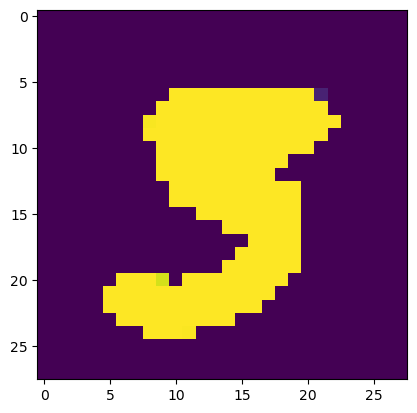

In [ ]:
plt.imshow(passed_images[0])


# 23 night - ahamedabad nikal lenge 24 morning --- 24 dwaraka darshan / 25 Nageswar ---  
# 26 morning leave reach Somnath stay ---- 27 morning Due stay --- 28 back to ahmedabad evn fligh

In [27]:
latentSpaceForNumber_7= encoder.predict(X_test[:10])  #What output will I get from here?

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [ ]:
finalDataFromDecoder = decoder.predict(latentSpaceForNumber_7)

plt.imshow(finalDataFromDecoder[0])